## Дипломный проект

#### Макавчик Влада DS04-onl

### Распознавание расстройства аутистического спектра на основе результатов прохождения теста AQ-10

Тест AQ-10 (Autism Spectrum Quotient-10) является инструментом, предназначенным для предварительной оценки возможности расстройства аутистического спектра (РАС) у взрослых, у которых нет умеренной или тяжелой неспособности к обучению. Он состоит из 10 вопросов и предоставляет краткую оценку вероятности наличия признаков аутизма.

Важно отметить, что AQ-10 не является окончательной диагностической процедурой, но его результаты могут послужить основой для решения, стоит ли проводить более подробное и обширное обследование на предмет РАС. AQ-10 служит лишь инструментом для начальной оценки и не предоставляет окончательной уверенности в диагнозе.

#### Цель задачи:

#### Тип решаемой задачи:
Бинарная классификация

#### Цель прогноза:
* Предсказать подтверждение РАС у пациентов после прохождения тестирования AQ-10

* Значения целевой метки классов:
    
    Class/ASD = 1 , РАС диагностировано
    
    Class/ASD = 0 , РАС не диагностировано

Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

Загрузка набора данных

In [2]:
df = pd.read_csv("autism-prediction/Autism-prediction/ASD.csv", sep=';')

In [3]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


* ID - ID пациента

* A1_Score - A10_Score - оценка на основе коэффициента аутистического спектра (AQ) по 10 критериям

* age - возраст пациента в годах

* gender - пол пациента. f - женский, m - мужской

* ethnicity - этническая принадлежность пацинта

* jaundice - была ли у пациента желтуха на момент рождения

* autism - было ли у кого-то из близких родственников пациента диагностировано расстройство аутистического спекта 

* country_of_res - страна проживание пациента

* used_app_before - проходил ли пациент ранее данное обследование

* result - оценка результатов теста

* age_desc - возраст пациента

* relation - отношение пациента с тем, кто проходил тест

* Class/ASD - классифицированный результат как 0 или 1. здесь 0 означает «нет», а 1 — «да». это целевой столбец

Посмотрим общую информацию о нашем наборе данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1000 non-null   int64  
 1   A1_Score         1000 non-null   int64  
 2   A2_Score         1000 non-null   int64  
 3   A3_Score         1000 non-null   int64  
 4   A4_Score         1000 non-null   int64  
 5   A5_Score         1000 non-null   int64  
 6   A6_Score         1000 non-null   int64  
 7   A7_Score         1000 non-null   int64  
 8   A8_Score         1000 non-null   int64  
 9   A9_Score         1000 non-null   int64  
 10  A10_Score        1000 non-null   int64  
 11  age              1000 non-null   float64
 12  gender           1000 non-null   object 
 13  ethnicity        1000 non-null   object 
 14  jaundice         1000 non-null   object 
 15  austim           1000 non-null   object 
 16  contry_of_res    1000 non-null   object 
 17  used_app_before

Удалим столбец 'ID' потому что нам не понадобятся ID пациентов

In [5]:
df = df.drop('ID', axis=1)

Посмотрим на уникальные значения, которые содержатся в каждом из столбцов

In [6]:
for column in df.columns:
    if column not in ['age', 'result']:
        unique_values = df[column].unique()
        print(f"Уникальные значения в столбце '{column}': {unique_values}")

Уникальные значения в столбце 'A1_Score': [1 0]
Уникальные значения в столбце 'A2_Score': [0 1]
Уникальные значения в столбце 'A3_Score': [1 0]
Уникальные значения в столбце 'A4_Score': [1 0]
Уникальные значения в столбце 'A5_Score': [1 0]
Уникальные значения в столбце 'A6_Score': [1 0]
Уникальные значения в столбце 'A7_Score': [0 1]
Уникальные значения в столбце 'A8_Score': [1 0]
Уникальные значения в столбце 'A9_Score': [1 0]
Уникальные значения в столбце 'A10_Score': [1 0]
Уникальные значения в столбце 'gender': ['f' 'm']
Уникальные значения в столбце 'ethnicity': ['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' '?'
 'others' 'Latino' 'Turkish' 'Others' 'Hispanic' 'Pasifika']
Уникальные значения в столбце 'jaundice': ['no' 'yes']
Уникальные значения в столбце 'austim': ['no' 'yes']
Уникальные значения в столбце 'contry_of_res': ['United States' 'Australia' 'United Kingdom' 'New Zealand' 'Italy'
 'Nicaragua' 'Canada' 'United Arab Emirates' 'Netherlands' 'Sri Lanka'
 

Заменим неверное название столбцов в нашем наборе данных

In [7]:
df = df.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")

Заменим в поле ethnicity значения '?' на 'Unknown', а 'others' на 'Others'.

В поле relation значения '?' также заменим на 'Unknown'

In [8]:
df.loc[df['ethnicity'] == '?', 'ethnicity'] = 'Unknown'
df.loc[df['ethnicity'] == 'others', 'ethnicity'] = 'Others'

df.loc[df['relation'] == '?', 'relation'] = 'Unknown'

Посмотрев на наш набор данных, видим, что столбец age_desc не важен, так как на всем наборе данных там одинаковые значения. Поэтому уберем его.

In [9]:
df = df.drop(['age_desc'], axis=1)

В нашем наборе данных есть поле 'age', представляющее возраст пациентов в форме чисел с плавающей точкой. Для удобства анализа и в соответствии с традицией измерения возраста в целых числах, мы выполним преобразование этого поля, заменив дробные значения на целочисленные данные, отражающие возраст пациентов.

In [10]:
df['age'] = df['age'].astype(int)

In [11]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,United States,no,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,Australia,no,10.544296,Unknown,0
2,1,1,1,1,1,1,0,0,1,1,14,f,White-European,no,no,United Kingdom,no,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,no,no,New Zealand,no,1.530098,Unknown,0
4,0,0,0,0,1,0,0,0,1,1,14,m,Black,no,yes,Italy,no,7.949723,Self,0


Посчитаем колиство положительных и отрицательных результатов диагностики РАС и сравним их.

In [12]:
ASD_pos = (df['Class/ASD'] == 1).sum()
ASD_neg = (df['Class/ASD'] == 0).sum()

In [13]:
print('Количество пациентов с положительным результатом теста:', ASD_pos)
print('Количество пациентов с отрицательным результатом теста:', ASD_neg)

Количество пациентов с положительным результатом теста: 275
Количество пациентов с отрицательным результатом теста: 725


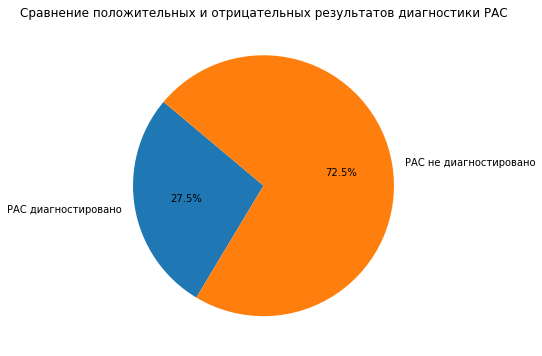

In [14]:
plt.figure(figsize=(10, 6))
values = [ASD_pos, ASD_neg]
plt.pie(values, labels=['РАС диагностировано', 'РАС не диагностировано'], autopct='%1.1f%%', startangle=140)
plt.title('Сравнение положительных и отрицательных результатов диагностики РАС')
plt.show()

275 человек (27.5%) из нашего набора данных имеют положительный диагноз РАС. 725 человек (72.5%) имеют отрицательный диагноз РАС.

Проанализируем результаты диагностики РАС по другим характеристикам

##### Возраст пациента

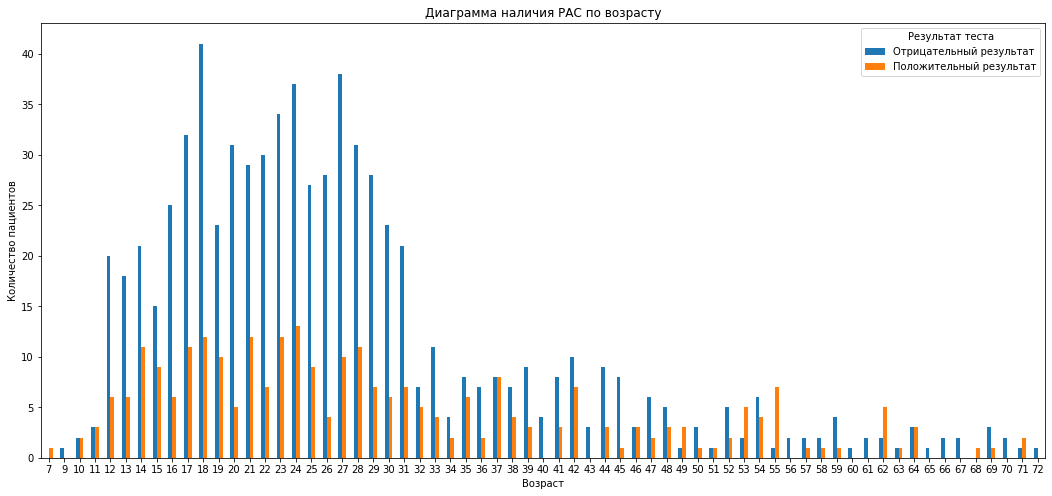

In [15]:
age_counts = df.groupby(['age', 'Class/ASD']).size().unstack(fill_value=0)

age_counts.plot(kind='bar', figsize=(18, 8))
plt.title('Диаграмма наличия РАС по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительный результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

Более подробно посмотрим на распределение положительных и отрицательных результатов тестирования по каждому возрасту

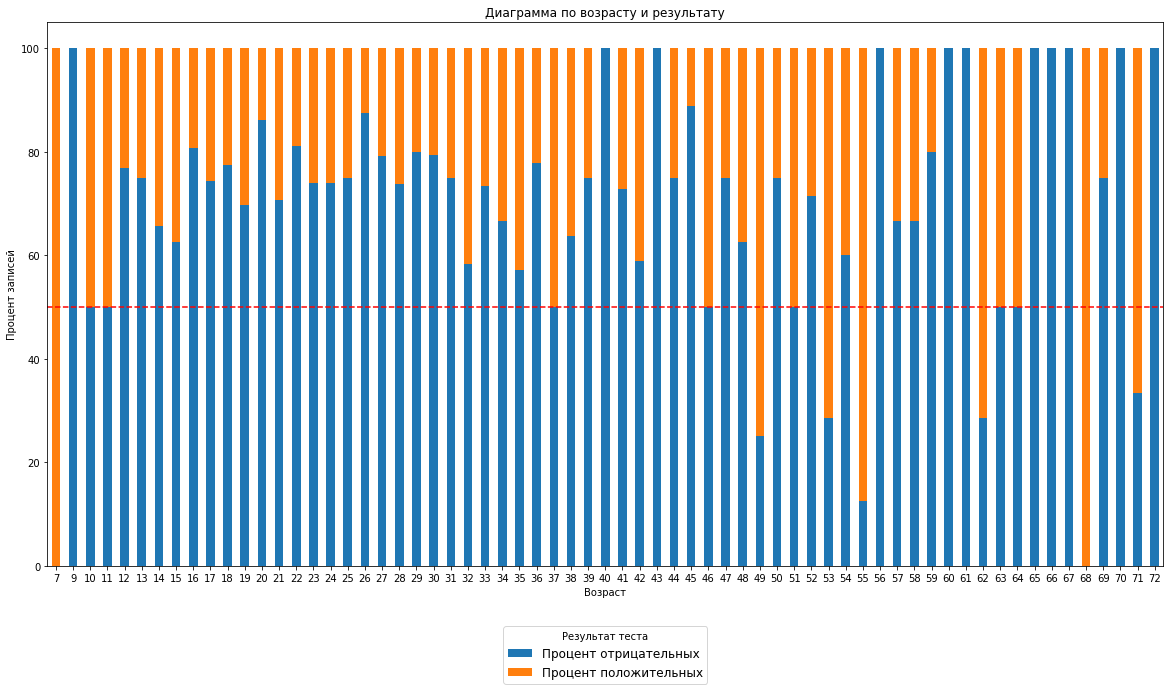

In [16]:
grouped_data = df.groupby(['age', 'Class/ASD']).size().unstack(fill_value=0)

total_counts = grouped_data.sum(axis=1)

grouped_data['Процент отрицательных'] = (grouped_data[0] / total_counts * 100).round(2)
grouped_data['Процент положительных'] = (grouped_data[1] / total_counts * 100).round(2)

grouped_data[['Процент отрицательных', 'Процент положительных']].plot(kind='bar', stacked=True, figsize=(20, 10))

plt.legend(['Процент отрицательных', 'Процент положительных'], title='Результат теста', bbox_to_anchor=(0.5, -0.10), loc='upper center', fontsize='large')
plt.axhline(y=50, color='r', linestyle='--') # линия, которая показывает 50%
plt.title('Диаграмма по возрасту и результату')
plt.xlabel('Возраст')
plt.ylabel('Процент записей')
plt.xticks(rotation=0)

plt.show()

Посчитаем количество тестируемых пациентов.

In [17]:
grouped_data['Кол-во пациентов'] = grouped_data[0] + grouped_data[1]

In [18]:
grouped_data.head()

Class/ASD,0,1,Процент отрицательных,Процент положительных,Кол-во пациентов
age,,,,,
7,0,1,0.00,100.00,1
9,1,0,100.00,0.00,1
10,2,2,50.00,50.00,4
11,3,3,50.00,50.00,6
12,20,6,76.92,23.08,26


In [19]:
print('Среднее количество пациентов в возрасте от 12 до 31, которые проходили тестирование: ' + str(grouped_data['Кол-во пациентов'][3:26].mean()))

Среднее количество пациентов в возрасте от 12 до 31, которые проходили тестирование: 33.0


In [20]:
print('Среднее количество пациентов старше 31 года, которые проходили тестирование: ' + str(grouped_data['Кол-во пациентов'][26:66].mean()))

Среднее количество пациентов старше 31 года, которые проходили тестирование: 6.0256410256410255


Посчитаем средний процент количества пациентов с отрицательным и положительным результатом тестирования

In [21]:
print('Среднее процент отрицательных результатов тестирования ' + str(grouped_data['Процент отрицательных'].mean()))
print('Среднее процент положительных результатов тестирования ' + str(grouped_data['Процент положительных'].mean()))

Среднее процент отрицательных результатов тестирования 69.15938461538462
Среднее процент положительных результатов тестирования 30.840615384615386


In [22]:
print('Среднее процент положительных результатов тестирования пациентов в возрасте от 12 до 31 года: ' + str(grouped_data['Процент положительных'][3:26].mean()))

Среднее процент положительных результатов тестирования пациентов в возрасте от 12 до 31 года: 26.110869565217385


In [23]:
print('Среднее процент положительных результатов тестирования пациентов старше 31 года: ' + str(grouped_data['Процент положительных'][26:66].mean()))

Среднее процент положительных результатов тестирования пациентов старше 31 года: 32.15615384615385


Основная группа пациентов, прошедших тестирование, находится в возрастном диапазоне от 12 до 31 лет, и их среднее количество составляет 33 человека. В тоже время, для пациентов старше 31 года это среднее количество сокращается до 6 человек. Это указывает на более активное прохождение тестирования в молодом возрасте.

Анализируя результаты тестирования, мы видим, что средний процент пациентов с положительным диагнозом РАС составляет 30.84%, в то время как 69.16% имеют отрицательный диагноз.

Если мы рассматриваем эти результаты в разрезе возрастных групп, то видим, что в возрасте от 12 до 31 лет средний процент положительно диагностированных РАС немного снижается и составляет 26.11%. В то время как у пациентов старше 31 года средний процент положительных диагнозов увеличивается до 32.16%.

##### Пол пациента

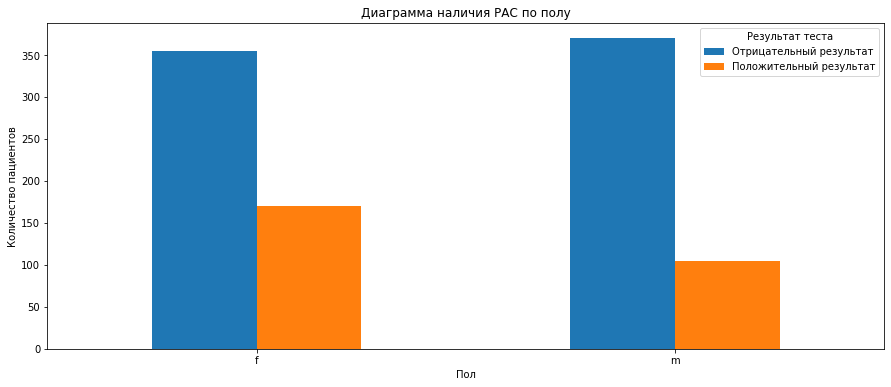

In [24]:
gender_counts = df.groupby(['gender', 'Class/ASD']).size().unstack(fill_value=0)

gender_counts.plot(kind='bar', figsize=(15, 6))
plt.title('Диаграмма наличия РАС по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительный результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

Посчитаем общее количество пациентов по полу

In [25]:
gender_counts['Пациенты'] = gender_counts[0] + gender_counts[1]

Посчитаем процент положительных и отрицательных диагнозов РАС в разрезе каждого пола

In [26]:
gender_counts['Процент отрицательных'] = (gender_counts[0] / gender_counts['Пациенты'] * 100).round(2)
gender_counts['Процент положительных'] = (gender_counts[1] / gender_counts['Пациенты'] * 100).round(2)

In [27]:
gender_counts

Class/ASD,0,1,Пациенты,Процент отрицательных,Процент положительных
gender,,,,,
f,355,170,525,67.62,32.38
m,370,105,475,77.89,22.11


In [28]:
print('Процент пациентов женщин среди всех пациентов: ' + str(gender_counts['Пациенты'][0] / (gender_counts['Пациенты'][0] + gender_counts['Пациенты'][1]) * 100))

Процент пациентов женщин среди всех пациентов: 52.5


In [29]:
print('Процент положительных диагнозов РАС среди общего количества женщин: ' + str(gender_counts['Процент положительных'][0]))

Процент положительных диагнозов РАС среди общего количества женщин: 32.38


In [30]:
print('Процент положительных диагнозов РАС среди общего количества мужчин: ' + str(gender_counts['Процент положительных'][1]))

Процент положительных диагнозов РАС среди общего количества мужчин: 22.11


В нашем наборе данных больше женщин, чем мужчин. Женщины составляют 52.5% от общего количества пациентов, в то время как мужчины составляют 47.5%. Это может быть связано с более высокой чувствительностью женщин к ранним симптомам или чащей медицинской консультацией.

Анализируя результаты диагностики аутизма (РАС), видно, что процент положительных диагнозов среди женщин составляет 32.38%, в то время как среди мужчин этот процент ниже и составляет 22.11%. Таким образом, больше женщин диагностируется с РАС по сравнению с мужчинами, несмотря на то, что количество пациентов по полу примерно равно.

##### Этническая принадлежность

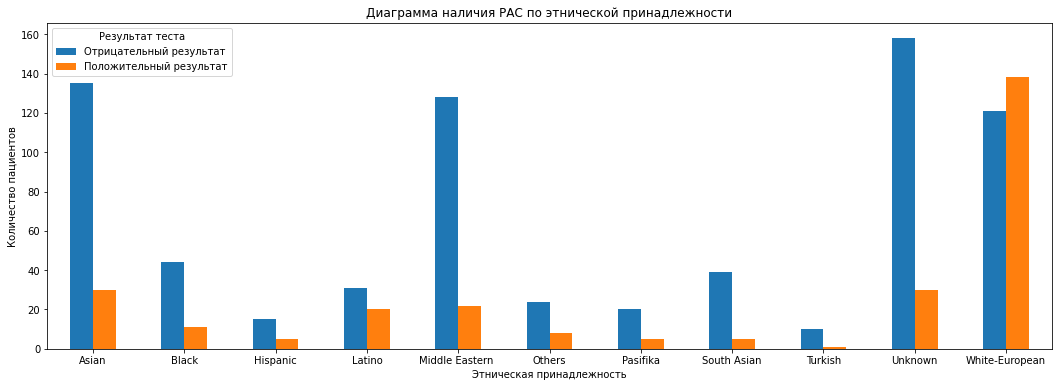

In [31]:
ethnicity_counts = df.groupby(['ethnicity', 'Class/ASD']).size().unstack(fill_value=0)

ethnicity_counts.plot(kind='bar', figsize=(18, 6))
plt.title('Диаграмма наличия РАС по этнической принадлежности')
plt.xlabel('Этническая принадлежность')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительный результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

Посчитаем количество пациентов в разрезе каждойэтнической группы

In [32]:
ethnicity_counts['Общее кол-во пациентов'] = ethnicity_counts[0] + ethnicity_counts[1]

Посчитаем процент положительно диагностированных пациентов по каждой из этнических групп

In [33]:
ethnicity_counts['% положительных'] = (ethnicity_counts[1] / ethnicity_counts['Общее кол-во пациентов'] * 100).round(2)

Посчитаем, какой процент составляют пациенты данной этнической группы относительно всех пациентов.

In [34]:
ethnicity_counts['% общего кол-ва пациентов'] = (ethnicity_counts['Общее кол-во пациентов'] / 1000 * 100).round(2)

Рассмотрим положительно диагностированных пациентов каждой этнической группы относительно всех пациентов.

Посчитаем процент положительных пациентов в этнической группе относительно всех этнических групп

In [35]:
ethnicity_counts['% положительных пациентов в данной этнич. гр. относительно всех'] = (ethnicity_counts[1] / 1000 * 100).round(2)

Посчитаем процент положительных пациентов в этнической группе относительно всех положительных пациентов

In [36]:
ethnicity_counts['% положительных пациентов в данной этнич. гр. относительно всех положительных'] = (ethnicity_counts[1] / ASD_pos * 100).round(2)

In [37]:
ethnicity_counts

Class/ASD,0,1,Общее кол-во пациентов,% положительных,% общего кол-ва пациентов,% положительных пациентов в данной этнич. гр. относительно всех,% положительных пациентов в данной этнич. гр. относительно всех положительных
ethnicity,,,,,,,
Asian,135,30,165,18.18,16.5,3.0,10.91
Black,44,11,55,20.00,5.5,1.1,4.00
Hispanic,15,5,20,25.00,2.0,0.5,1.82
Latino,31,20,51,39.22,5.1,2.0,7.27
Middle Eastern,128,22,150,14.67,15.0,2.2,8.00
Others,24,8,32,25.00,3.2,0.8,2.91
Pasifika,20,5,25,20.00,2.5,0.5,1.82
South Asian,39,5,44,11.36,4.4,0.5,1.82
Turkish,10,1,11,9.09,1.1,0.1,0.36


Этническая группа "White-European" имеет самый высокий процент положительных результатов (13.8%) в общем наборе данных и так же самый большой среди всех положительно диагностированных пациентов (50.18%), в то время как у этнических групп "Pasifika" (0.5%) и "Turkish" (0.1%) процент в общем наборе данных гораздо ниже.

Так же у нас имеется значительный процент неопределенных случаев. Заметно, что процент положительных у пациентов с этнической группой "Unknown" составляет 10.91% относительно всех положительно диагностированных пациентов, что является вторым по величине значением (делит данное второе место с этнической группой "Asian", у которой так же 10.91%). Необходимо провести дополнительные исследования, чтобы выяснить причины таких значений и уточнить информацию об этнической принадлежности.

Если рассматривать каждую этническую группу отдельно, то наибольший процент положительно диагностированных пациентов наблюдается в White-European с 53.28%, следом идут Latino с 39.22%.

##### Наличие желтухи при рождении

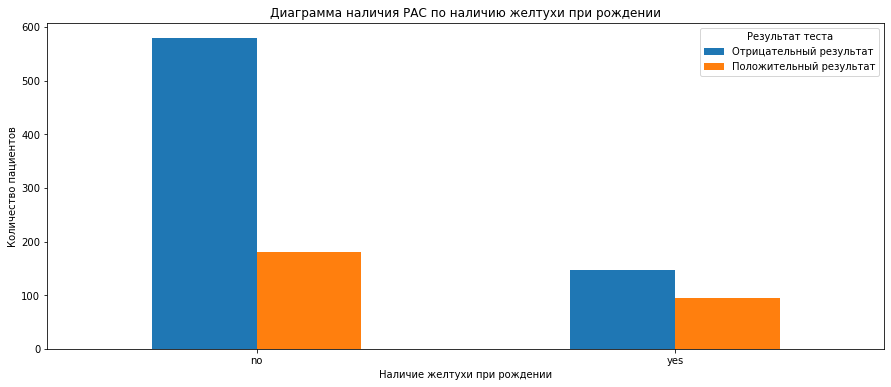

In [38]:
jaundice_counts = df.groupby(['jaundice', 'Class/ASD']).size().unstack(fill_value=0)

jaundice_counts.plot(kind='bar', figsize=(15, 6))
plt.title('Диаграмма наличия РАС по наличию желтухи при рождении')
plt.xlabel('Наличие желтухи при рождении')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительный результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

Посчитаем общее количество пациентов для тех кто болел при рождении желтухой и для тех кто нет. 

In [39]:
jaundice_counts['Общее кол-во пациентов'] = jaundice_counts[0] + jaundice_counts[1]

Посчитаем процент положительных диагнозов для каждой из групп

In [40]:
jaundice_counts['% положительных диагнозов'] = (jaundice_counts[1] / jaundice_counts['Общее кол-во пациентов'] * 100).round(2)

Посчитаем процент положительно диагностированных пациентов для каждой их групп относительно всех пациентов

In [41]:
jaundice_counts['% положительных пациентов относительно всех'] = (jaundice_counts[1] / 1000 * 100).round(2)

Посчитаем процент положительно диагностированных пациентов для каждой их групп относительно всех положительных пациентов

In [42]:
jaundice_counts['% положительных пациентов относительно положительных'] = (jaundice_counts[1] / ASD_pos * 100).round(2)

In [43]:
jaundice_counts

Class/ASD,0,1,Общее кол-во пациентов,% положительных диагнозов,% положительных пациентов относительно всех,% положительных пациентов относительно положительных
jaundice,,,,,,
no,579,181,760,23.82,18.1,65.82
yes,146,94,240,39.17,9.4,34.18


Процент положительных диагнозов среди пациентов, у которых была желтуха при рождении, составляет 39.17%, что существенно выше, чем среди пациентов без желтухи при рождении, где этот процент составляет 23.82%. Это может указывать на связь между наличием желтухи и вероятностью положительного диагноза РАС.

Пациенты, у которых была желтуха в момент рождения и у которых был диагностировано РАС, составляют 34.18% от общего чиста положительно диагностированных пациентов.

##### Было ли у кого-то из близких родственников пациента диагностировано расстройство аутистического спекта

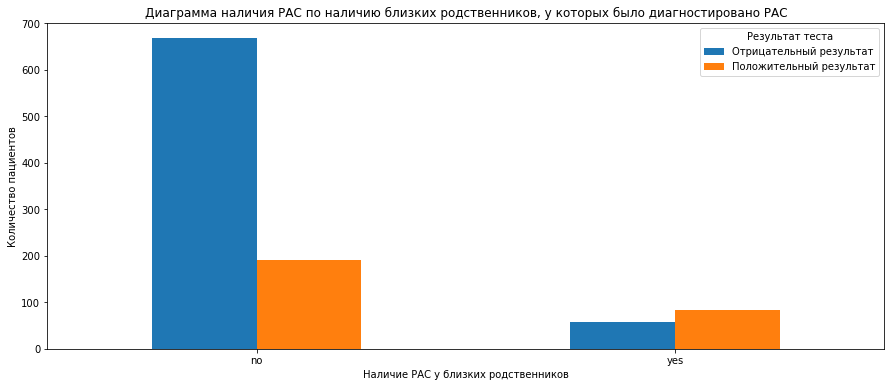

In [44]:
autism_counts = df.groupby(['autism', 'Class/ASD']).size().unstack(fill_value=0)

autism_counts.plot(kind='bar', figsize=(15, 6))
plt.title('Диаграмма наличия РАС по наличию близких родственников, у которых было диагностировано РАС')
plt.xlabel('Наличие РАС у близких родственников')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительный результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

Посчитаем общее количество пациентов по группам

In [45]:
autism_counts['Общее кол-во пациентов в группах'] = autism_counts[0] + autism_counts[1]

Посчитаем процент пациентов по группам относительно всех пациентов

In [46]:
autism_counts['% пациентов в группах'] = autism_counts['Общее кол-во пациентов в группах'] / 1000 * 100

Посчитаем процент положительных диагнозов по группам

In [47]:
autism_counts['% положительных диагнозов по группам'] = (autism_counts[1] / autism_counts['Общее кол-во пациентов в группах'] * 100).round(2)

Посчитаем процент положительных пациентов каждой из групп относительно всех пациентов

In [48]:
autism_counts['% положительных пациентов группы относительно общего кол-ва пациентов'] = (autism_counts[1] / 1000 * 100).round(2)

Посчитаем процент положительных пациентов каждой группы относительно всех положительных пациентов

In [49]:
autism_counts['% положительных пациентов группы относительно положительных пациентов'] = (autism_counts[1] / ASD_pos * 100).round(2)

In [50]:
autism_counts

Class/ASD,0,1,Общее кол-во пациентов в группах,% пациентов в группах,% положительных диагнозов по группам,% положительных пациентов группы относительно общего кол-ва пациентов,% положительных пациентов группы относительно положительных пациентов
autism,,,,,,,
no,668,191,859,85.9,22.24,19.1,69.45
yes,57,84,141,14.1,59.57,8.4,30.55


Группа пациентов, у близких родственников которых не диагностировано РАС, составляет значительное большинство - 85.9%. В этой группе процент положительных диагнозов составляет 22.24%, а в разрезе всех положительно диагностированных пациентов - 69.45%.

Группа пациентов, у близких родственников которых диагностирован аутизм, сравнительно небольшая - 14.1%. Однако в этой группе высокий процент положительных диагнозов - 55.57%, но в разрезе всех положительно диагностированных пациентов - 30.55%.

##### Страна проживание пациента

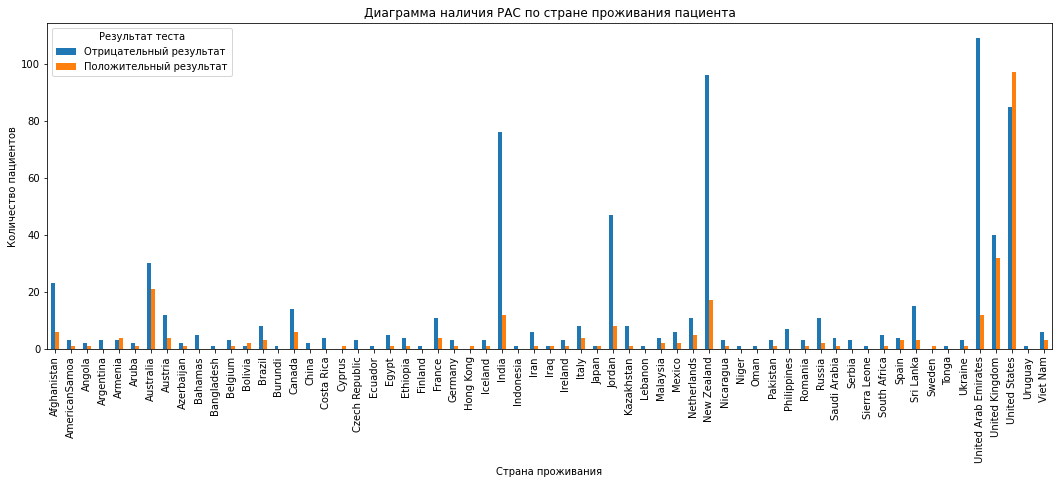

In [51]:
country_of_res_counts = df.groupby(['country_of_res', 'Class/ASD']).size().unstack(fill_value=0)

country_of_res_counts.plot(kind='bar', figsize=(18, 6))
plt.title('Диаграмма наличия РАС по стране проживания пациента')
plt.xlabel('Страна проживания')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительный результат'], title='Результат теста')
plt.show()

Посчитаем общее количество пациентов в группах по стране проживания

In [52]:
country_of_res_counts['Общее кол-во пациентов в группах'] = country_of_res_counts[0] + country_of_res_counts[1]

Посчитаем процент пациентов в группах от общего числа пациентов

In [53]:
country_of_res_counts['% пациентов в группах'] = country_of_res_counts['Общее кол-во пациентов в группах'] / 1000 * 100

Посчитаем процент положительных диагнозов по группам

In [54]:
country_of_res_counts['% положительных диагнозов по группам'] = (country_of_res_counts[1] / country_of_res_counts['Общее кол-во пациентов в группах'] * 100).round(2)

Посчитаем процент положительных пациентов группы относительно общего количества пациентов

In [55]:
country_of_res_counts['% положительных пациентов группы относительно общего кол-ва пациентов'] = (country_of_res_counts[1] / 1000 * 100).round(2)

Посчитам процент положительных пациентов группы относительно общего количества положительных пациентов

In [56]:
country_of_res_counts['% положительных пациентов группы относительно положительных пациентов'] = (country_of_res_counts[1] / ASD_pos * 100).round(2)

In [57]:
country_of_res_counts.head(60)

Class/ASD,0,1,Общее кол-во пациентов в группах,% пациентов в группах,% положительных диагнозов по группам,% положительных пациентов группы относительно общего кол-ва пациентов,% положительных пациентов группы относительно положительных пациентов
country_of_res,,,,,,,
Afghanistan,23,6,29,2.9,20.69,0.6,2.18
AmericanSamoa,3,1,4,0.4,25.00,0.1,0.36
Angola,2,1,3,0.3,33.33,0.1,0.36
Argentina,3,0,3,0.3,0.00,0.0,0.00
Armenia,3,4,7,0.7,57.14,0.4,1.45
Aruba,2,1,3,0.3,33.33,0.1,0.36
Australia,30,21,51,5.1,41.18,2.1,7.64
Austria,12,4,16,1.6,25.00,0.4,1.45
Azerbaijan,2,1,3,0.3,33.33,0.1,0.36


In [58]:
country_of_res_counts.tail(3)

Class/ASD,0,1,Общее кол-во пациентов в группах,% пациентов в группах,% положительных диагнозов по группам,% положительных пациентов группы относительно общего кол-ва пациентов,% положительных пациентов группы относительно положительных пациентов
country_of_res,,,,,,,
United States,85,97,182,18.2,53.30,9.7,35.27
Uruguay,1,0,1,0.1,0.00,0.0,0.00
Viet Nam,6,3,9,0.9,33.33,0.3,1.09


In [59]:
max_value = country_of_res_counts.iloc[:, -1].max()
max_value

35.27

In [60]:
country_with_max_value = country_of_res_counts[country_of_res_counts.iloc[:, -1] == max_value].index[0]

In [61]:
print('Страна с самым большим процентов положительно диагностированных пациентов среди всех положительных пациентов: ' + country_with_max_value + ' со значением ' + str(max_value))

Страна с самым большим процентов положительно диагностированных пациентов среди всех положительных пациентов: United States со значением 35.27


##### Проходил ли пациент ранее данное обследование

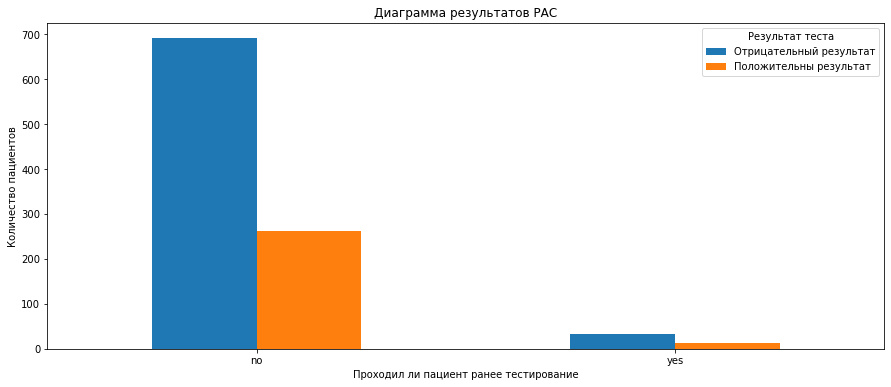

In [62]:
used_app_counts = df.groupby(['used_app_before', 'Class/ASD']).size().unstack(fill_value=0)

used_app_counts.plot(kind='bar', figsize=(15, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Проходил ли пациент ранее тестирование')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

Посчитаем общее количество пациентов в группах

In [63]:
used_app_counts['Общее кол-во пациентов в группах'] = used_app_counts[0] + used_app_counts[1]

Посчитаем процент положительных диагнозов по группам

In [64]:
used_app_counts['% положительных диагнозов по группам'] = (used_app_counts[1] / used_app_counts['Общее кол-во пациентов в группах'] * 100).round(2)

Посчитаем процент положительных пациентов группы относительно общего количества пациентов

In [65]:
used_app_counts['% положительных пациентов группы относительно общего кол-ва пациентов'] = (used_app_counts[1] / 1000 * 100).round(2)

Посчитаем процент положительных пациентов группы относительно общего количества положительных пациентов

In [66]:
used_app_counts['% положительных пациентов группы относительно положительных пациентов'] = (used_app_counts[1] / ASD_pos * 100).round(2)

In [67]:
used_app_counts

Class/ASD,0,1,Общее кол-во пациентов в группах,% положительных диагнозов по группам,% положительных пациентов группы относительно общего кол-ва пациентов,% положительных пациентов группы относительно положительных пациентов
used_app_before,,,,,,
no,691,262,953,27.49,26.2,95.27
yes,34,13,47,27.66,1.3,4.73


Сравнивая общее количество пациентов, которые ранее не проходили тестирование и тех, кто проходил, можно видеть, что практически все положительно диагностированные пациенты в группе тех, кто не проходил тестирование, и составляют 95.06% от общего числа положительных пациентов.

Среди пациентов, не проходивших ранее тестирование, процент положительных диагнозов составляет 27.49%. У тех, кто ранее проходил тестирование, этот процент примерно такой же и равняется 27.66%.

Доля положительно диагностированных пациентов относительно общего количества пациентов в каждой из групп значительно различаются. Для пациентов, проходивших тестирование, эта доля составляет 1.3%, в то время как для тех, кто не проходил тестирование, она выше и составляет 26.2%.

##### Отношение пациента с тем, кто заполнял тестирование

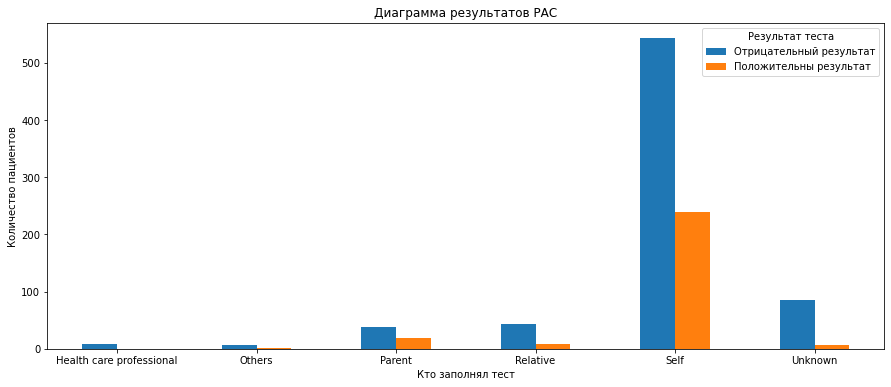

In [68]:
relation_counts = df.groupby(['relation', 'Class/ASD']).size().unstack(fill_value=0)

relation_counts.plot(kind='bar', figsize=(15, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Кто заполнял тест')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

Посчитаем общее количество пациентов в группах

In [69]:
relation_counts['Общее кол-во пациентов в группах'] = relation_counts[0] + relation_counts[1]

Посчитаем процент пациентов в группах

In [70]:
relation_counts['% пациентов в группах'] = relation_counts['Общее кол-во пациентов в группах'] / 1000 * 100

Посчитаем процент положительных пациентов по группам

In [71]:
relation_counts['% положительных диагнозов по группам'] = (relation_counts[1] / relation_counts['Общее кол-во пациентов в группах'] * 100).round(2)

Посчитаем процент положительных пациентов по группам относительно общего количества пациентов

In [72]:
relation_counts['% положительных пациентов группы относительно общего кол-ва пациентов'] = (relation_counts[1] / 1000 * 100).round(2)

Посчитаем процент положительных пациентов группы относительно общего количества положительных пациентов

In [73]:
relation_counts['% положительных пациентов группы относительно положительных пациентов'] = (relation_counts[1] / ASD_pos * 100).round(2)

In [74]:
relation_counts

Class/ASD,0,1,Общее кол-во пациентов в группах,% пациентов в группах,% положительных диагнозов по группам,% положительных пациентов группы относительно общего кол-ва пациентов,% положительных пациентов группы относительно положительных пациентов
relation,,,,,,,
Health care professional,8,0,8,0.8,0.00,0.0,0.00
Others,7,1,8,0.8,12.50,0.1,0.36
Parent,38,19,57,5.7,33.33,1.9,6.91
Relative,44,9,53,5.3,16.98,0.9,3.27
Self,543,240,783,78.3,30.65,24.0,87.27
Unknown,85,6,91,9.1,6.59,0.6,2.18


Группа пациентов, которые сами заполняли тест ("Self"), составляют значительное большинство среди всех групп отношений (78.3% от общего числа пациентов). Эта группа также имеет наивысший процент положительных диагнозов среди общего количества пациентов (24.0%), а также занимает второе место по проценту положительных пациентов в группе (30.65%).

Группы "Parent" и "Relative" также имеют значительное количество пациентов (5.7% и 5.3% соответственно) и высокий процент положительных диагнозов внутри группы (33.33% и 16.98% соответственно). Эти группы представляют собой второй и третий по величине процент положительных диагнозов относительно положительных пациентов.

Группа "Health care professional" имеет самый низкий процент положительных диагнозов (0%) и самый маленький процент пациентов (0.8%). Это может быть связано с тем, что профессионалы в здравоохранении могут иметь больший опыт и знания, что позволяет им более точно определять отрицательные диагнозы РАС.

Группа "Unknown" включает пациентов, у которых неизвестно отношение к заполнявшему тестирование. У этой группы сравнительно низкий процент положительных диагнозов (6.59% положительных результатов в группе и 2.18% относительно общего количества положительных пациентов), и они составляют 9.1% от общего числа пациентов.

##### Оценка результатов теста AQ1-10

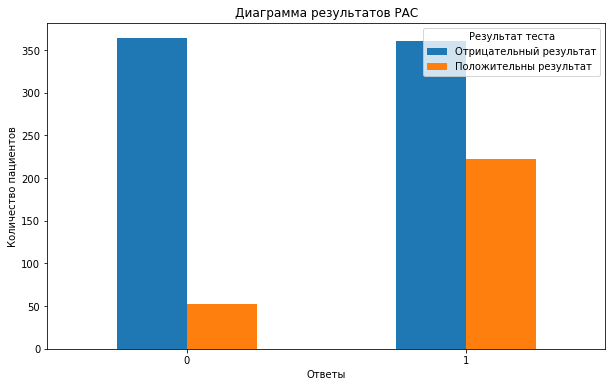

In [75]:
A1_Score_counts = df.groupby(['A1_Score', 'Class/ASD']).size().unstack(fill_value=0)

A1_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Ответы')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

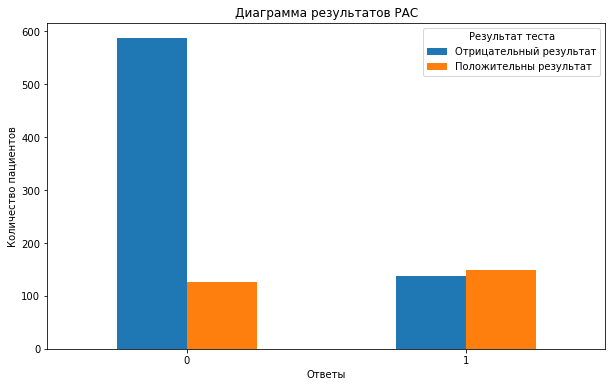

In [76]:
A2_Score_counts = df.groupby(['A2_Score', 'Class/ASD']).size().unstack(fill_value=0)

A2_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Ответы')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

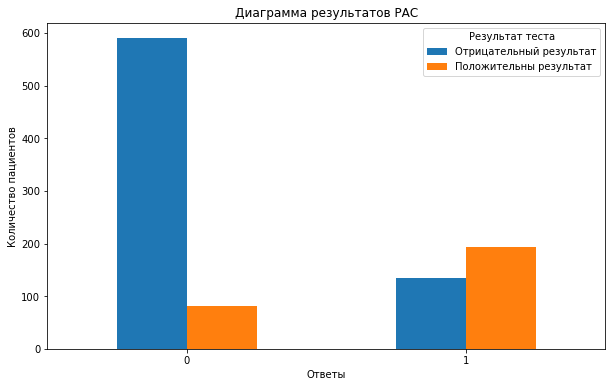

In [77]:
A3_Score_counts = df.groupby(['A3_Score', 'Class/ASD']).size().unstack(fill_value=0)

A3_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Ответы')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

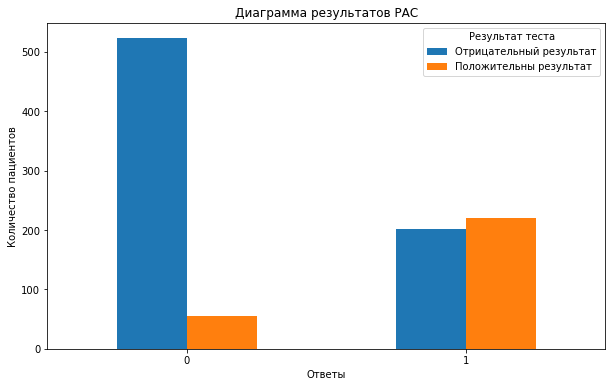

In [78]:
A4_Score_counts = df.groupby(['A4_Score', 'Class/ASD']).size().unstack(fill_value=0)

A4_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Ответы')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

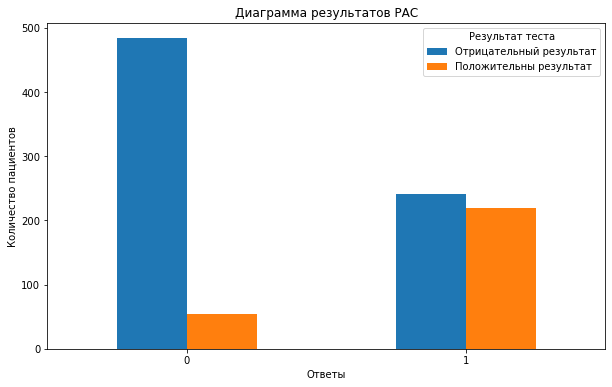

In [79]:
A5_Score_counts = df.groupby(['A5_Score', 'Class/ASD']).size().unstack(fill_value=0)

A5_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Ответы')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

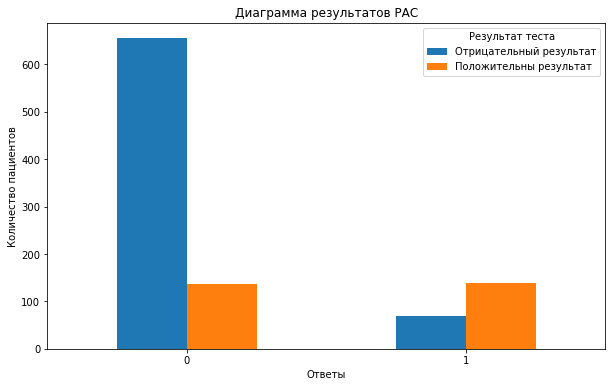

In [80]:
A6_Score_counts = df.groupby(['A6_Score', 'Class/ASD']).size().unstack(fill_value=0)

A6_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Ответы')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

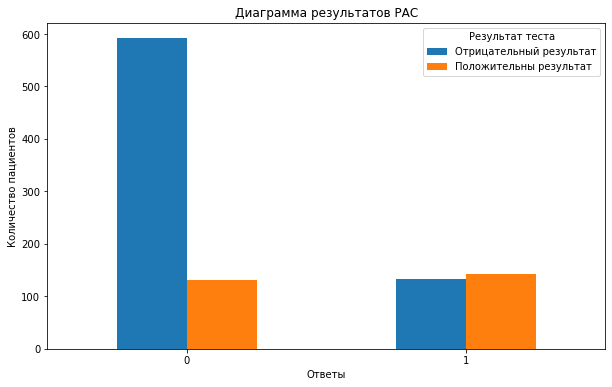

In [81]:
A7_Score_counts = df.groupby(['A7_Score', 'Class/ASD']).size().unstack(fill_value=0)

A7_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Ответы')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

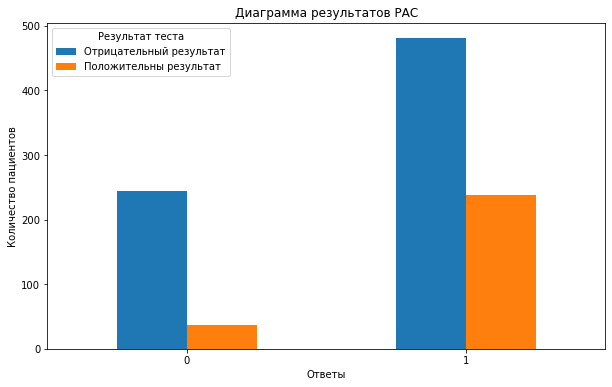

In [82]:
A8_Score_counts = df.groupby(['A8_Score', 'Class/ASD']).size().unstack(fill_value=0)

A8_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Ответы')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

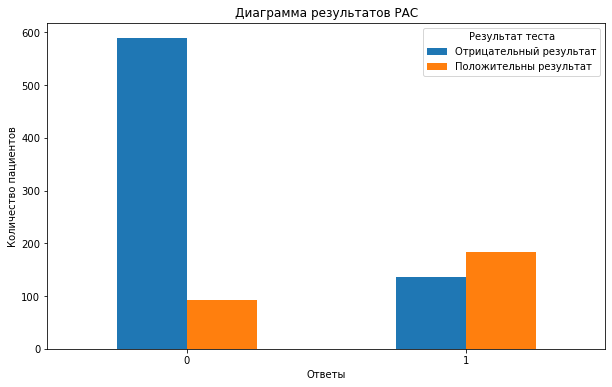

In [83]:
A9_Score_counts = df.groupby(['A9_Score', 'Class/ASD']).size().unstack(fill_value=0)

A9_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Ответы')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

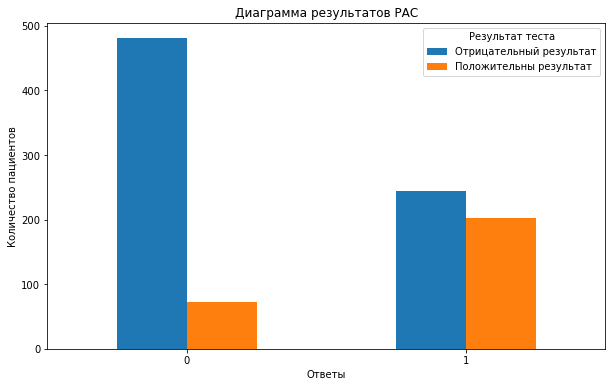

In [84]:
A10_Score_counts = df.groupby(['A10_Score', 'Class/ASD']).size().unstack(fill_value=0)

A10_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Диаграмма результатов РАС')
plt.xlabel('Ответы')
plt.ylabel('Количество пациентов')
plt.legend(['Отрицательный результат', 'Положительны результат'], title='Результат теста')
plt.xticks(rotation=0)
plt.show()

Значения 'yes' и 'no' в полях 'jaundice', 'autism' и 'used_app_before' заменим на '1' и '0' соответсвенно

In [85]:
df['jaundice'] = df['jaundice'].replace({'yes': 1, 'no': 0})
df['autism'] = df['autism'].replace({'yes': 1, 'no': 0})
df['used_app_before'] = df['used_app_before'].replace({'yes': 1, 'no': 0})

In [86]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,0,0,United States,0,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,0,0,Australia,0,10.544296,Unknown,0
2,1,1,1,1,1,1,0,0,1,1,14,f,White-European,0,0,United Kingdom,0,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,0,0,New Zealand,0,1.530098,Unknown,0
4,0,0,0,0,1,0,0,0,1,1,14,m,Black,0,1,Italy,0,7.949723,Self,0


Построим матрицу корреляции

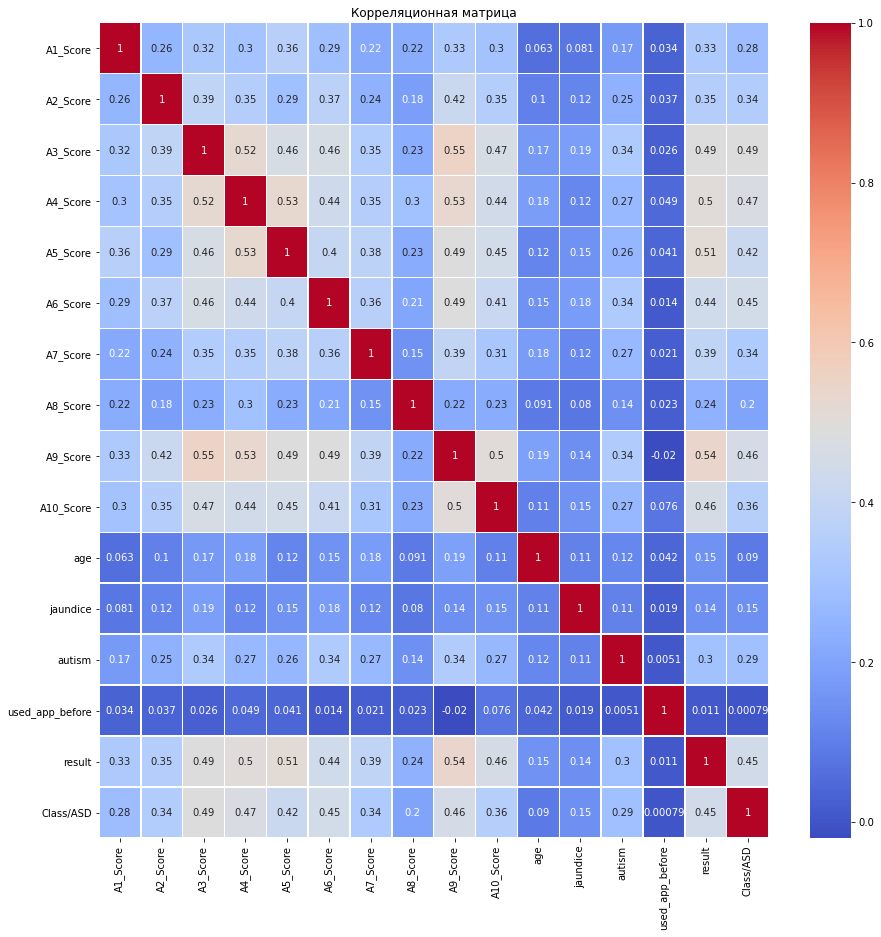

In [87]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

Некоторые пары переменных имеют высокие положительные корреляции. Например, переменные A3_Score и A4_Score имеют корреляцию 0.524366, что говорит о том, что при увеличении ответов на вопросы A3 и A4, результаты также увеличиваются. Аналогично, переменные A3_Score и A9_Score имеют высокую положительную корреляцию (0.554643), что указывает на сильную связь между ответами на вопросы A3 и A9.

С другой стороны, некоторые переменные имеют высокие отрицательные корреляции. Например, переменная autism имеет корреляцию -0.108723 с переменной jaundice. Это может указывать на наличие обратной связи между некоторыми переменными.

Также стоит отметить, что переменные, связанные с ответами на вопросы в тесте (A1_Score до A10_Score), имеют относительно низкие корреляции с возрастом (age), что может означать, что возраст не сильно влияет на ответы пациентов на вопросы в тесте.

Что касается целевой переменной Class/ASD, то некоторые переменные имеют некоторое влияние на эту целевую переменную. Например, переменные A3_Score и A9_Score имеют относительно высокие корреляции с Class/ASD (0.490384 и 0.471378 соответственно), что может означать, что ответы на эти вопросы могут быть связаны с наличием РАС.

#### Подготовка данных

Удалим переменные, которые не играют большого значения в определении РАС (страна проживания пациента и проходил ли пациент до этого диагностику).

In [88]:
df = df.drop('country_of_res', axis=1)
df = df.drop('used_app_before', axis=1)

In [89]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,0,0,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,0,0,10.544296,Unknown,0
2,1,1,1,1,1,1,0,0,1,1,14,f,White-European,0,0,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,0,0,1.530098,Unknown,0
4,0,0,0,0,1,0,0,0,1,1,14,m,Black,0,1,7.949723,Self,0


Закодируем наши категориальные признаки с использованием OneHotEncoder

In [90]:
oh = OneHotEncoder()

In [91]:
h_inter1, h_categories1 = df['gender'].factorize()
h_inter2, h_categories2 = df['ethnicity'].factorize()
h_inter3, h_categories3 = df['relation'].factorize()

In [92]:
h_categories1

Index(['f', 'm'], dtype='object')

In [93]:
h_categories2

Index(['White-European', 'South Asian', 'Black', 'Asian', 'Middle Eastern ',
       'Unknown', 'Others', 'Latino', 'Turkish', 'Hispanic', 'Pasifika'],
      dtype='object')

In [94]:
h_categories3

Index(['Self', 'Unknown', 'Health care professional', 'Parent', 'Relative',
       'Others'],
      dtype='object')

In [95]:
coded1 = oh.fit_transform(h_inter1.reshape(-1,1))
coded2 = oh.fit_transform(h_inter2.reshape(-1,1))
coded3 = oh.fit_transform(h_inter3.reshape(-1,1))

In [96]:
proxy1 = pd.DataFrame(coded1.toarray(), columns = ['female', 'male'])
proxy2 = pd.DataFrame(coded2.toarray(), columns = ['White-European', 'South Asian', 'Black', 'Asian', 'Middle Eastern ',
                                                   'Unknown ethnicity', 'Others', 'Latino', 'Turkish', 'Hispanic', 'Pasifika'])
proxy3 = pd.DataFrame(coded3.toarray(), columns = ['Self', 'Unknown relation', 'Health care professional', 'Parent', 'Relative',
       'Others'])

In [97]:
df = pd.concat([df, proxy1], axis = 1)
df = pd.concat([df, proxy2], axis = 1)
df = pd.concat([df, proxy3], axis = 1)

In [98]:
df = df.drop(['gender'], axis=1)
df = df.drop(['ethnicity'], axis=1)
df = df.drop(['relation'], axis=1)

In [99]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Latino,Turkish,Hispanic,Pasifika,Self,Unknown relation,Health care professional,Parent,Relative,Others
0,1,0,1,1,1,1,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,1,0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Отделим нашу целевую переменную Class/ASD

In [100]:
X = df.drop(['Class/ASD'], axis=1)
Y = df['Class/ASD']

Разделим наши данные на данные для обучения и проверки

In [101]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)

Сделаем масштабирование данных с использованием StandardScaler

In [102]:
ss = StandardScaler()

In [103]:
X_train_ss = ss.fit_transform(X_train)

In [104]:
X_test_ss = ss.transform(X_test)

#### Логистическая регрессия

In [105]:
logreg = LogisticRegression()

In [106]:
logreg.fit(X_train_ss, Y_train)

LogisticRegression()

In [107]:
pred_logreg = logreg.predict(X_test_ss)

In [108]:
binary_pred_logreg = [1 if pred >= 0.5 else 0 for pred in pred_logreg]

In [109]:
confusion_matrix(Y_test, binary_pred_logreg)

array([[133,  14],
       [ 27,  26]], dtype=int64)

In [110]:
accuracy_score(Y_test, binary_pred_logreg)

0.795

#### Дерево решений

In [111]:
tree = DecisionTreeClassifier()

In [112]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [113]:
pred_tree = tree.predict(X_test_ss)

In [114]:
confusion_matrix(Y_test,pred_tree)

array([[119,  28],
       [ 48,   5]], dtype=int64)

In [115]:
accuracy_score(Y_test,pred_tree)

0.62

#### Случайный лес

In [116]:
forest_class = RandomForestClassifier()

In [117]:
forest_class.fit(X_train_ss, Y_train)

RandomForestClassifier()

In [118]:
preds_forest_class = forest_class.predict(X_test_ss)

In [119]:
accuracy_score(Y_test, preds_forest_class)

0.79

In [120]:
confusion_matrix(Y_test,preds_forest_class)

array([[132,  15],
       [ 27,  26]], dtype=int64)

Рассмотрим важность признаков

In [121]:
importances = forest_class.feature_importances_

features = X_train.columns
feature_importance = list(zip(features, importances))

# отсортируем важности наших признаков в порядке убывания
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"Признак: {feature}, Важность: {importance}")

Признак: result, Важность: 0.20093547406823833
Признак: age, Важность: 0.11629528161409718
Признак: A4_Score, Важность: 0.08142608735018188
Признак: A6_Score, Важность: 0.07154389653024938
Признак: A3_Score, Важность: 0.06942667838769151
Признак: A9_Score, Важность: 0.048976624453738384
Признак: A5_Score, Важность: 0.0489087111630372
Признак: A7_Score, Важность: 0.0415257333224732
Признак: A2_Score, Важность: 0.02947823949569969
Признак: A10_Score, Важность: 0.029066040114375868
Признак: autism, Важность: 0.028051158035171855
Признак: jaundice, Важность: 0.024508350145954195
Признак: White-European, Важность: 0.024430152522190093
Признак: A8_Score, Важность: 0.021496832310794422
Признак: A1_Score, Важность: 0.0195025370482114
Признак: Unknown ethnicity, Важность: 0.017075851162322898
Признак: female, Важность: 0.01602211179743347
Признак: male, Важность: 0.016010245295910896
Признак: Asian, Важность: 0.01194516140190859
Признак: Self, Важность: 0.011650421997696956
Признак: Middle East

На основе анализа важности признаков видно, что оценка результата теста (result) и возраст пациента (age) оказывают наибольшее влияние на модель диагностики РАС. Эти признаки имеют наибольшие значения важности, что может указывать на их решающую роль в прогнозировании диагноза. Оценки по некоторым конкретным вопросам теста, таким как A4_Score, A6_Score, A3_Score, и A5_Score, также оказывают существенное влияние. Важность этнической принадлежности, пола, наличия желтухи при рождении и других признаков относительно результатов тестов относительно невелика.

#### GRID SEARCH

In [122]:
param_grid = {'n_estimators': [5,10,15,20], 'max_features':[5,10,15,20,25,30]}

grid_search = GridSearchCV(forest_class, param_grid, cv = 5, scoring = 'roc_auc')

In [123]:
grid_search.fit(X_train_ss, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [5, 10, 15, 20]},
             scoring='roc_auc')

In [124]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 15}

In [125]:
grid_forest = grid_search.best_estimator_

In [126]:
pred_grid_serch = grid_forest.predict(X_test_ss)

In [127]:
confusion_matrix(Y_test,pred_grid_serch)

array([[133,  14],
       [ 25,  28]], dtype=int64)

In [128]:
accuracy_score(Y_test, pred_grid_serch)

0.805

#### Стохастический поиск

In [129]:
SGDclf = SGDClassifier()

In [130]:
SGDclf.fit(X_train_ss, Y_train)

SGDClassifier()

In [131]:
pred_SGDclf = SGDclf.predict(X_test_ss)

In [132]:
confusion_matrix(Y_test, pred_SGDclf)

array([[125,  22],
       [ 18,  35]], dtype=int64)

In [133]:
accuracy_score(Y_test, pred_SGDclf)

0.8

#### Метод опорных векторов

In [134]:
SVMclf = svm.SVC(kernel='linear')

In [135]:
SVMclf.fit(X_train_ss, Y_train)

SVC(kernel='linear')

In [136]:
pred_SVMclf = SVMclf.predict(X_test_ss)

In [137]:
confusion_matrix(Y_test, pred_SVMclf)

array([[132,  15],
       [ 25,  28]], dtype=int64)

In [138]:
accuracy_score(Y_test, pred_SVMclf)

0.8

#### Адаптивный бустинг

In [139]:
Adaclf = AdaBoostClassifier()

In [140]:
Adaclf.fit(X_train_ss, Y_train)

AdaBoostClassifier()

In [141]:
pred_Adaclf = Adaclf.predict(X_test_ss)

In [142]:
confusion_matrix(Y_test, pred_Adaclf)

array([[132,  15],
       [ 28,  25]], dtype=int64)

In [143]:
accuracy_score(Y_test, pred_Adaclf)

0.785

#### Модель голосования

Для Voting модели объединим несколько различных моделей для принятия решения.

In [144]:
best_rf_params = grid_search.best_params_

In [145]:
best_rf_params

{'max_features': 10, 'n_estimators': 15}

In [146]:
voiting_rf = RandomForestClassifier(max_features=best_rf_params['max_features'], n_estimators=best_rf_params['n_estimators'])
voiting_ada = AdaBoostClassifier()
voiting_svm = svm.SVC(kernel='linear', probability=True)

In [147]:
voting_clf = VotingClassifier(estimators=[('rf', voiting_rf), ('ada', voiting_ada), ('svc', voiting_svm)], voting='soft')

In [148]:
voting_clf.fit(X_train_ss, Y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_features=10,
                                                     n_estimators=15)),
                             ('ada', AdaBoostClassifier()),
                             ('svc', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [149]:
pred_voiting = voting_clf.predict(X_test_ss)

In [150]:
confusion_matrix(Y_test, pred_voiting)

array([[133,  14],
       [ 24,  29]], dtype=int64)

In [151]:
accuracy_score(Y_test, pred_voiting)

0.81

#### Нейронные сети

In [152]:
X_train.shape

(800, 33)

In [153]:
model = models.Sequential()

model.add(layers.Dense(128,input_shape=(33,),activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation="sigmoid"))

In [154]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4352      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,233
Trainable params: 15,233
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [156]:
X_train_new, X_val, Y_train_new, Y_val =  train_test_split(X_train_ss, Y_train, test_size = 0.2, random_state = 4)

In [157]:
history = model.fit(X_train_new, Y_train_new, epochs=20, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/20
10/10 [==============================] - 2s 38ms/step - loss: 0.5550 - accuracy: 0.7578 - val_loss: 0.4939 - val_accuracy: 0.8375
Epoch 2/20
10/10 [==============================] - 0s 16ms/step - loss: 0.4386 - accuracy: 0.8250 - val_loss: 0.4186 - val_accuracy: 0.8500
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.3868 - accuracy: 0.8484 - val_loss: 0.4084 - val_accuracy: 0.8500
Epoch 4/20
10/10 [==============================] - 0s 11ms/step - loss: 0.3629 - accuracy: 0.8625 - val_loss: 0.4089 - val_accuracy: 0.8438
Epoch 5/20
10/10 [==============================] - 0s 13ms/step - loss: 0.3414 - accuracy: 0.8656 - val_loss: 0.4091 - val_accuracy: 0.8438
Epoch 6/20
10/10 [==============================] - 0s 11ms/step - loss: 0.3254 - accuracy: 0.8766 - val_loss: 0.4133 - val_accuracy: 0.8625
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 0.3117 - accuracy: 0.8797 - val_loss: 0.4299 - val_accuracy: 0.8438
Epoch 8/20
10/

In [158]:
loss, accuracy = model.evaluate(X_test_ss, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.8487 - accuracy: 0.7750


### Выводы

##### Выводы основываясь на анализе показателей:

На основе анализа важности признаков видно, что оценка результата теста (result) и возраст пациента (age) оказывают наибольшее влияние на модель диагностики РАС. Оценки по некоторым конкретным вопросам теста, таким как A4_Score, A6_Score, A3_Score, и A5_Score, также оказывают существенное влияние. Важность этнической принадлежности, пола, наличия желтухи при рождении и других признаков относительно результатов тестов относительно невелика.

##### Анализ результатов, полученных в процессе обучения различных моделей:

В процессе обучения различных моделей и оценки их производительности по метрике точности (accuracy_score), мы получили следующие результаты.

Наибольшую точность продемонстрировала модель VotingClassifier, которая объединила RandomForestClassifier, AdaBoostClassifier и SVC, достигнув точности в 0.81. Это подтверждает силу ансамблевых методов, объединяя модели с разными алгоритмами и делает данную модель лучшим выбором среди рассмотренных.

Затем идут модели GridSearchCV с точностью 0.805 и SVC и SGDClassifier, которые обе имеют точность 0.8. Эти модели также показали отличную производительность.

LogisticRegression, RandomForestClassifier и AdaBoostClassifier показывают незначительные снижения точности 0.795, 0.79 и 0.785 соответственно.

Однако, модель DecisionTreeClassifier показала более скромные результаты, достигнув точности в 0.62.

Нейронные сети также показали неплохую производительность с точностью в 0.775, что делает их конкурентоспособными, хотя они уступают тем же VotingClassifier и GridSearchCV, которые обеспечивают наилучшую точность в данном контексте.


##### Финальный вывод

Результаты теста AQ-10 не могут заменить клинический диагноз расстройства аутистического спектра (РАС), так как они представляют собой всего лишь первоначальное тестирование, направленное на определение необходимости дальнейших диагностических мероприятий, проводимых медицинским персоналом. Однако важно отметить, что результаты, полученные с использованием моделей машинного обучения, могут быть полезными инструментами для первичного скрининга и оценки риска.

Согласно исследованиям ученых, около 75% пациентов, у которых AQ-10 показывает высокие результаты, впоследствии получают клинический диагноз РАС. Это подчеркивает важность теста AQ-10 как первого этапа для выявления потенциальных случаев РАС.

Исходя из наших результатов, где модели машинного обучения продемонстрировали точность в 80%, можно считать, что они предсказывают клинический диагноз с высокой степенью точности. Этот результат является весьма обнадеживающим, и, хотя он не может быть конечным диагнозом, он служит важным инструментом для первоначального выявления случаев РАС и направления на дополнительные медицинские исследования.